# Data Preprocessing
we can use different interpolation techniques to estimate the missing values from the other training samples in our dataset.

### Regular Import

In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('Solarize_Light2')
plt.rcParams["font.size"] = 14

In [3]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [4]:
df = pd.read_csv(StringIO(csv_data))

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### Imputing Missing Value

Common imputation is replacing the missing value with the mean of the feature vector.

In [6]:
from sklearn.preprocessing import Imputer

In [7]:
imr = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
imr = imr.fit(df.values)

/home/datapsycho/PycharmProjects/StatBase/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# Handeling Categorical Data

In [9]:
df = pd.DataFrame(
    [['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']]
)
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


#### Ordinal Data Processing

In [10]:
# Ordinal Feature Map
size_mapping = {'XL': 3,'L': 2, 'M': 1}

In [11]:
df['size'] = df['size'].map(size_mapping)

In [12]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


#### Class Data Processing

In [13]:
# Encoding Class Label Manually
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
# Scikitlearn Implementation 
from sklearn.preprocessing import LabelEncoder

In [16]:
class_le = LabelEncoder()

In [17]:
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

#### Nominal Data Processing

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# Step 1 convert the data to numerical value
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])

# Step 2: Apply One Hot encoding
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

/home/datapsycho/PycharmProjects/StatBase/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/datapsycho/PycharmProjects/StatBase/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
# Pandas Implementation 
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [21]:
# Removing the first using Onehot encoding
ohe.fit_transform(X).toarray()[:, 1:]

/home/datapsycho/PycharmProjects/StatBase/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/datapsycho/PycharmProjects/StatBase/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

#### Partitioning Dataset

In [22]:
col_list = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline']

In [23]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, names=col_list)

In [24]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### Scalling the Features
There are 2 types of feature scaling Normalization and standardization. Min-Max scaling is a spacial case of Normalization where the scaled value will be between 0 to 1.

\begin{align}
    x_{norm}^{(i)} = \dfrac{x^{(i)} - x_{min}}{x_{max} - x_{min}}
\end{align}

In [28]:
# In Code
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

\begin{align}
    x_{std}^{(i)} = \dfrac{x^{(i)} - \mu_{x}}{\sigma_{x}}
\end{align}

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### L1 and L2 Regularization
In case of smaller amount of data, overfitting or model complexity regularization works very well to reduce ovefitting. the L2 and L1 regularization also known as Ridge and Lasso regrassion. Technically the L2 and L2 regression influence the slope of the regression and instead of proper fit with the data it do little bit off fit based on the sensitivity hyperparameter of the regularization. The larger penalties implies more larger off fit and flat slope. When applying regularization it is best to do cross validation with multiple hyperparameter values and then select one that has least test validation error. 

In case when the parameter dimention is larger than the total amount of data regularizaiton can be used to fit a bare minimum model.

*Note: In Scikitlearn C=1.0 is the default for L1 regularization. You can increase or decrease it to make the regularization effect stronger or weaker, respectively.*

In [32]:
# Model Fitting with Regularization
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lr.fit(X_train_std, y_train)

/home/datapsycho/PycharmProjects/StatBase/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 1.0


In [35]:
lr.coef_

array([[ 1.24599936,  0.1805891 ,  0.74484029, -1.16261101,  0.        ,
         0.        ,  1.16512087,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5519737 ,  2.50963711],
       [-1.53702849, -0.38731151, -0.99520257,  0.36481115, -0.05968556,
         0.        ,  0.6679621 ,  0.        ,  0.        , -1.93396099,
         1.23423917,  0.        , -2.2322316 ],
       [ 0.1356436 ,  0.16855633,  0.35717607,  0.        ,  0.        ,
         0.        , -2.43795147,  0.        ,  0.        ,  1.56378931,
        -0.81902893, -0.49248252,  0.        ]])

*Note: Since we fit the LogisticRegression object on a multiclass dataset, it uses the One-versus-Rest (OvR) approach by default, where the first intercept belongs to the model that fits class 1 versus class 2 and 3, the second value is the intercept of the model that fits class 2 versus class 1 and 3, and the third value is the intercept of the model that fits class 3 versus class 1 and 2*

In [36]:
feature_coefficient_dict = {key:value for key, value in zip(df_wine.columns[1:],lr.coef_[1])}

In [37]:
print("Intercept One Versus All: ", lr.intercept_[1])
print("Coefficient One Versus All: ", feature_coefficient_dict)

Intercept One Versus All:  -1.2160774239198278
Coefficient One Versus All:  {'Alcohol': -1.5370284944516368, 'Malic acid': -0.3873115137553887, 'Ash': -0.995202574053996, 'Alcalinity of ash': 0.36481115178943707, 'Magnesium': -0.05968556047460181, 'Total phenols': 0.0, 'Flavanoids': 0.667962104530079, 'Nonflavanoid phenols': 0.0, 'Proanthocyanins': 0.0, 'Color intensity': -1.93396099077593, 'Hue': 1.234239166790716, 'OD280/OD315 of diluted wines': 0.0, 'Proline': -2.232231601804516}


In [38]:
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 1.0


### Sinsitivity of Regularization on Features

In [39]:
import matplotlib.pyplot as plt

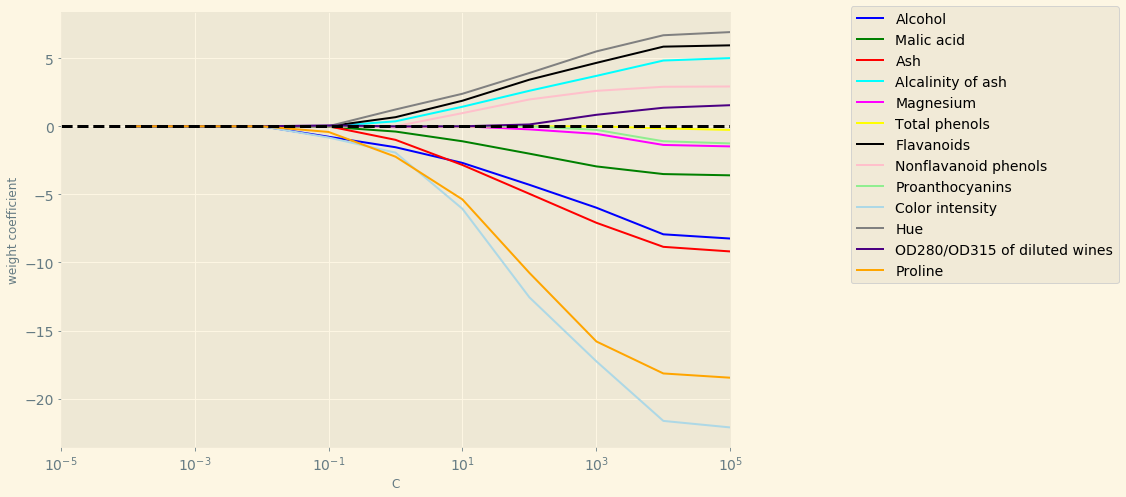

In [46]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6):
    strength =  10**c
    lr = LogisticRegression(penalty='l1', C=strength, random_state=0, solver='liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(strength)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

*Note: The resulting plot provides us with further insights into the behavior of L1 regularization. As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter ( C < 0.1 ); C is the inverse of the regularization parameter λ. Also we can notice whtich feature is more sensitive to regularization*

### Sequential Feature Selection Algorithms
An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection, which is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques: feature selection and feature extraction. **Via feature selection, we select a subset of the original features, whereas in feature extraction, we derive information from the feature set to construct a new feature subspace**.[1]

#### Sequential Backward Selection (SBS)

we can outline the algorithm in four simple steps:
- Initialize the algorithm with $k=d$, where d is the dimensionality of the full feature space $X_d$.
- Determine the feature $x^{-}$ that maximizes the criterion:$x^{-} = argmax J(X_{k} - x)$, where $x \epsilon X_{k}$.
- Remove the feature  $x^{-}$ from the feature set: $X_{k -1} = X_{k} − x^{-} ; k = k − 1$.
- Terminate if k equals the number of desired features; otherwise, go to step 2.

In [41]:
from neuralbase.featurizer import SBS

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

In [44]:
k_feat = [len(k) for k in sbs.subsets_]

Text(0.5, 0, 'Number of features')

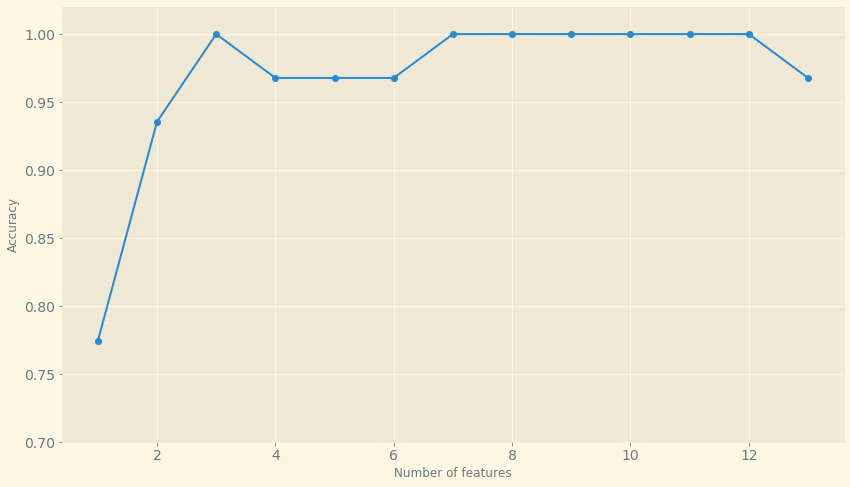

In [48]:
plt.figure(figsize=(14, 8))
plt.plot(k_feat, sbs.score_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')

*Note: It looks like the even very smallest subset with 3 features yield very good result*

In [51]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

In [62]:
print("Features that gives Optimum fit is {}, {} and {}.".format(*set(df_wine.columns[1:][k3])))

Features that gives Optimum fit is Malic acid, OD280/OD315 of diluted wines and Alcohol.


### Testing and Evaluation with full data nd selected feature set

Next let's evaluate the performance of the KNN classifier on the original test set:

In [63]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))

Training accuracy: 0.967741935483871


In [65]:
print('Test accuracy:', knn.score(X_test_std, y_test))

Test accuracy: 0.9629629629629629


In [66]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:',knn.score(X_train_std[:, k3], y_train))

Training accuracy: 0.9516129032258065


In [67]:
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Test accuracy: 0.9259259259259259


*Note: Using less than a quarter of the original features in the Wine dataset, the prediction accuracy on the test set declined slightly.*

### Assessing Feature Importance with Random Forests
we will now train a forest of 500 trees on the Wine dataset and rank the 13 features by their respective importance measures.

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
feat_labels = df_wine.columns[1: ]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # :: -1 reverse ordering [1, 2, 3] => [3, 2, 1]

In [91]:
for f in range(X_train.shape[1]):
    print("{:2}) {:30} {:5f}".format(f + 1, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


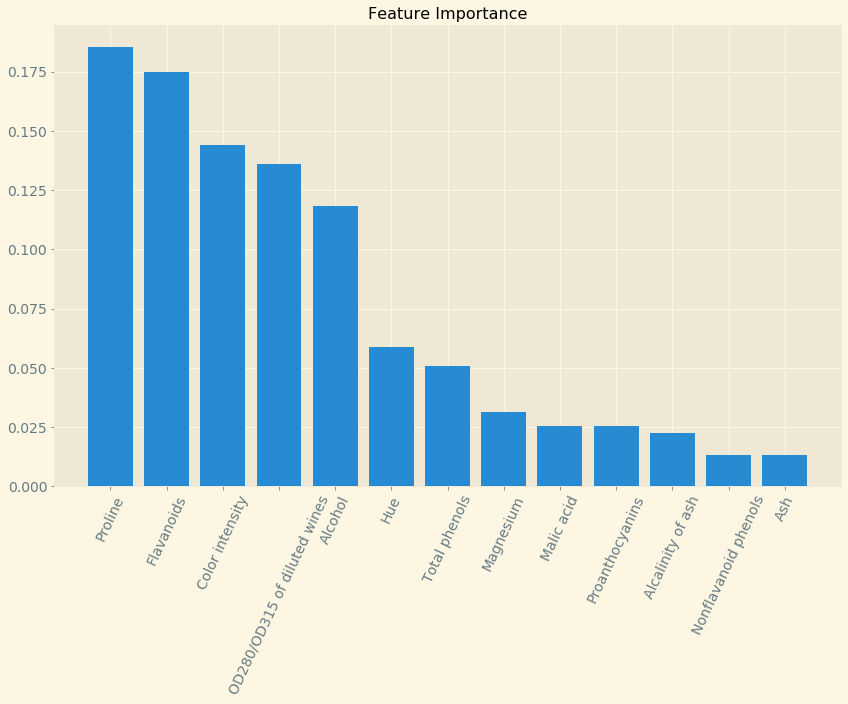

In [94]:
plt.figure(figsize=(12, 10))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=65)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

*We can conclude that the proline and flavonoid levels, the color intensity, the OD280/OD315 diffraction, and the alcohol concentration of wine are the most discriminative features in the dataset based on the average impurity decrease in the
500 decision trees.*[1]

*scikit-learn also implements a SelectFromModel object that selects features based on a user-specified threshold after model fitting, which is useful if we want to use the RandomForestClassifier as a feature selector and intermediate step in a scikit-learn Pipeline object, which allows us to connect different preprocessing steps with an estimator.*[1]

In [95]:
from sklearn.feature_selection import SelectFromModel

In [96]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [98]:
X_selected = sfm.transform(X_train)

In [99]:
print('Number of features that meet this threshold criterion:', X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [100]:
for f in range(X_selected.shape[1]):
    print("{:2}) {:30} {:5f}".format(f + 1, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


### Referances

[1] Python Machine Learning Second Edition